In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


fields = ['hcpcs_code',
 'hcpcs_description',
 'line_srvc_cnt',
 'bene_unique_cnt',
 'bene_day_srvc_cnt',
 'average_Medicare_allowed_amt',
 'average_submitted_chrg_amt',
 'average_Medicare_payment_amt',
 'average_Medicare_standard_amt']

df = pd.read_csv("Medicare_Provider_Util_Payment_PUF_CY2015.txt", sep='\t', usecols=fields)
df = df.dropna()
df.corr()

,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
line_srvc_cnt,1.000000,0.441004,0.523365,-0.011438,-0.010937,-0.011256,-0.011495
bene_unique_cnt,0.441004,1.000000,0.867489,-0.008735,-0.009361,-0.008497,-0.008667
bene_day_srvc_cnt,0.523365,0.867489,1.000000,-0.008703,-0.009690,-0.008585,-0.008761
average_Medicare_allowed_amt,-0.011438,-0.008735,-0.008703,1.000000,0.748461,0.999017,0.994273
average_submitted_chrg_amt,-0.010937,-0.009361,-0.009690,0.748461,1.000000,0.747969,0.743975
average_Medicare_payment_amt,-0.011256,-0.008497,-0.008585,0.999017,0.747969,1.000000,0.994486
average_Medicare_standard_amt,-0.011495,-0.008667,-0.008761,0.994273,0.743975,0.994486,1.000000


In [5]:
#Data Preprocessing
df = df[['hcpcs_code','hcpcs_description','line_srvc_cnt', 'bene_unique_cnt', 'average_Medicare_allowed_amt', 'average_submitted_chrg_amt']]
df['total_Medicare_allowed_amt'] = df.apply(lambda row: row.line_srvc_cnt * row.average_Medicare_allowed_amt, axis=1)
df['total_submitted_charge_amt'] = df.apply(lambda row: row.line_srvc_cnt * row.average_submitted_chrg_amt, axis=1)

df.drop(['average_Medicare_allowed_amt'], axis = 1, inplace = True)
df.drop(['average_submitted_chrg_amt'], axis = 1, inplace = True)
df.head()

,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_unique_cnt,total_Medicare_allowed_amt,total_submitted_charge_amt
1,99217,Hospital observation care discharge,23.0,23.0,1671.640000,7544.000000
2,99219,Hospital observation care typically 50 minutes,18.0,18.0,2445.300000,11052.000000
3,99221,"Initial hospital inpatient care, typically 30 ...",59.0,58.0,5980.540000,19664.000000
4,99222,"Initial hospital inpatient care, typically 50 ...",132.0,130.0,18349.380001,47057.000000
5,99223,"Initial hospital inpatient care, typically 70 ...",220.0,215.0,45140.910001,138861.000001


In [6]:
df.head()

,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_unique_cnt,total_Medicare_allowed_amt,total_submitted_charge_amt
1,99217,Hospital observation care discharge,23.0,23.0,1671.640000,7544.000000
2,99219,Hospital observation care typically 50 minutes,18.0,18.0,2445.300000,11052.000000
3,99221,"Initial hospital inpatient care, typically 30 ...",59.0,58.0,5980.540000,19664.000000
4,99222,"Initial hospital inpatient care, typically 50 ...",132.0,130.0,18349.380001,47057.000000
5,99223,"Initial hospital inpatient care, typically 70 ...",220.0,215.0,45140.910001,138861.000001


In [7]:
count_physicians = pd.DataFrame(df['hcpcs_code'].value_counts().reset_index())
count_physicians = count_physicians.rename(index=str, columns={"hcpcs_code": "num_physicians_cnt", "index":"hcpcs_code"})

groups = df.groupby('hcpcs_code').sum().reset_index()
groups = groups.join(count_physicians.set_index('hcpcs_code'), on='hcpcs_code')

groups.head()

,hcpcs_code,line_srvc_cnt,bene_unique_cnt,total_Medicare_allowed_amt,total_submitted_charge_amt,num_physicians_cnt
0,00100,60.0,57.0,1.601183e+04,8.924960e+04,4
1,00102,130.0,129.0,1.232808e+04,6.590150e+04,5
2,00103,71318.0,69564.0,1.102565e+07,6.425369e+07,2441
3,00104,142799.0,66466.0,1.275516e+07,8.594126e+07,2939
4,00120,2425.0,2223.0,4.867235e+05,3.525604e+06,110


In [8]:
groups['submitted_chrg_to_allowed_amt'] = groups.apply(lambda row: row.total_submitted_charge_amt/row.total_Medicare_allowed_amt, axis=1)
groups['average_submitted_chrg_amt'] = groups.apply(lambda row: row.total_submitted_charge_amt/row.line_srvc_cnt, axis=1)

groups.drop(['total_Medicare_allowed_amt'], axis = 1, inplace = True)
groups.drop(['total_submitted_charge_amt'], axis = 1, inplace = True)
groups.head()

,hcpcs_code,line_srvc_cnt,bene_unique_cnt,num_physicians_cnt,submitted_chrg_to_allowed_amt,average_submitted_chrg_amt
0,00100,60.0,57.0,4,5.573979,1487.493333
1,00102,130.0,129.0,5,5.345642,506.934615
2,00103,71318.0,69564.0,2441,5.827657,900.946364
3,00104,142799.0,66466.0,2939,6.737764,601.833783
4,00120,2425.0,2223.0,110,7.243546,1453.857336


In [9]:
groups.corr()

,line_srvc_cnt,bene_unique_cnt,num_physicians_cnt,submitted_chrg_to_allowed_amt,average_submitted_chrg_amt
line_srvc_cnt,1.000000,0.652451,0.562266,-0.003775,-0.050029
bene_unique_cnt,0.652451,1.000000,0.890454,-0.015823,-0.048547
num_physicians_cnt,0.562266,0.890454,1.000000,-0.020269,-0.056629
submitted_chrg_to_allowed_amt,-0.003775,-0.015823,-0.020269,1.000000,0.049920
average_submitted_chrg_amt,-0.050029,-0.048547,-0.056629,0.049920,1.000000


In [10]:
def plot_hist(df_series, bins = 100, range_x_min = 0, range_x_max = 2000, range_y_min = 0, range_y_max = 600, 
             x_label = '', y_label ='', title= ''):
    plt.figure()
    df_series.plot.hist(alpha=1, bins=bins, range=(range_x_min, range_x_max))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.axis([range_x_min, range_x_max, range_y_min, range_y_max])
    plt.grid(True)
   
    fig = plt.gcf()
    fig.set_size_inches(9, 5)
    plt.show()
    

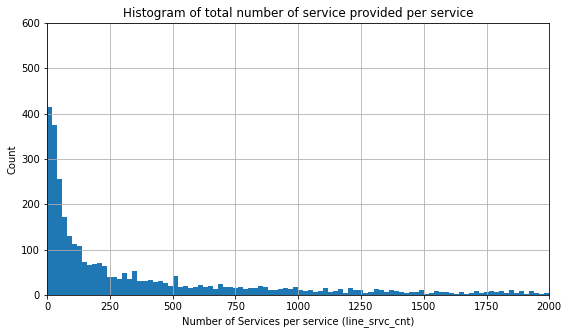

In [11]:
plot_hist(groups['line_srvc_cnt'], bins = 100, range_x_min = 0, range_x_max = 2000, range_y_min = 0, range_y_max = 600, 
             x_label = "Number of Services per service (line_srvc_cnt)",
             y_label = "Count",
             title = "Histogram of total number of service provided per service")

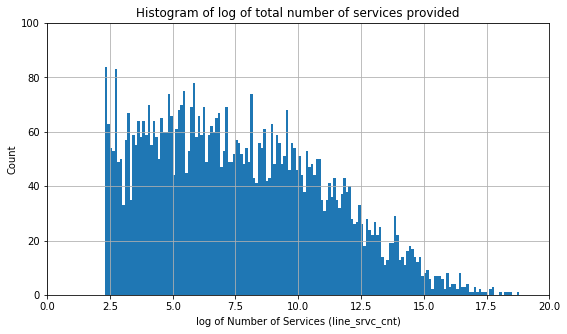

In [12]:
plot_hist(groups['line_srvc_cnt'].apply(np.log), bins = 200, range_x_min = 0, range_x_max = 20, range_y_min = 0, range_y_max = 100, 
             x_label = "log of Number of Services (line_srvc_cnt)",
             y_label = "Count",
             title = "Histogram of log of total number of services provided")

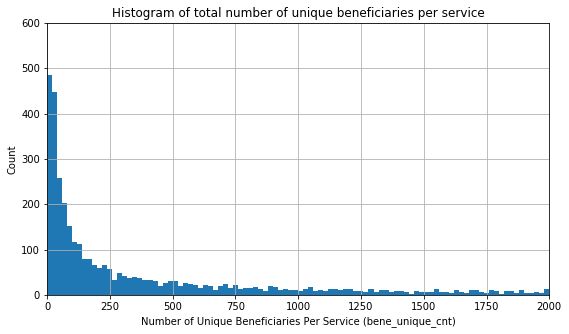

In [13]:
plot_hist(groups['bene_unique_cnt'], bins = 100, range_x_min = 0, range_x_max = 2000, range_y_min = 0, range_y_max = 600, 
             x_label = "Number of Unique Beneficiaries Per Service (bene_unique_cnt)",
             y_label = "Count",
             title = "Histogram of total number of unique beneficiaries per service")

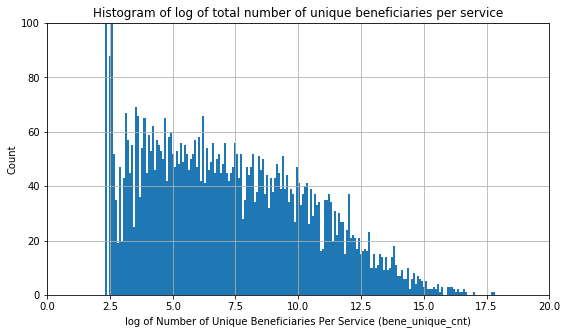

In [14]:
plot_hist(groups['bene_unique_cnt'].apply(np.log), bins = 250, range_x_min = 0, range_x_max = 20, range_y_min = 0, range_y_max = 100, 
             x_label = "log of Number of Unique Beneficiaries Per Service (bene_unique_cnt)",
             y_label = "Count",
             title = "Histogram of log of total number of unique beneficiaries per service")

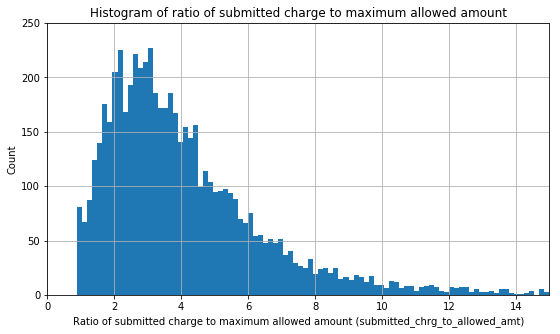

In [15]:
plot_hist(groups['submitted_chrg_to_allowed_amt'], bins = 100, range_x_min = 0, range_x_max = 15, range_y_min = 0, range_y_max = 250, 
             x_label = "Ratio of submitted charge to maximum allowed amount (submitted_chrg_to_allowed_amt)",
             y_label = "Count",
             title = "Histogram of ratio of submitted charge to maximum allowed amount")

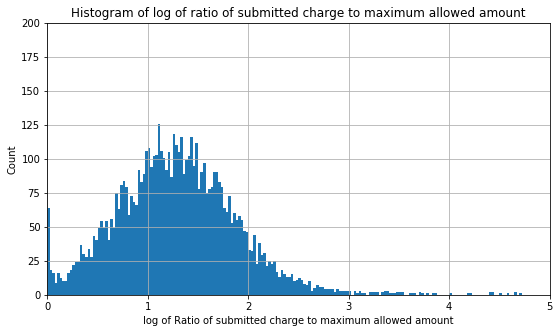

In [16]:
plot_hist(groups['submitted_chrg_to_allowed_amt'].apply(np.log), bins = 200, range_x_min = 0, range_x_max = 5, range_y_min = 0, range_y_max = 200, 
             x_label = "log of Ratio of submitted charge to maximum allowed amount",
             y_label = "Count",
             title = "Histogram of log of ratio of submitted charge to maximum allowed amount")

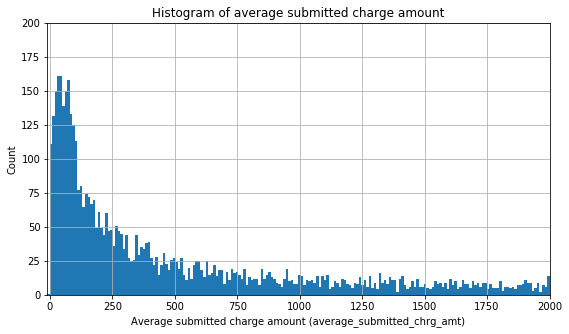

In [17]:
plot_hist(groups['average_submitted_chrg_amt'], bins = 200, range_x_min = -10, range_x_max = 2000, range_y_min = 0, range_y_max = 200, 
             x_label = "Average submitted charge amount (average_submitted_chrg_amt)",
             y_label = "Count",
             title = "Histogram of average submitted charge amount")

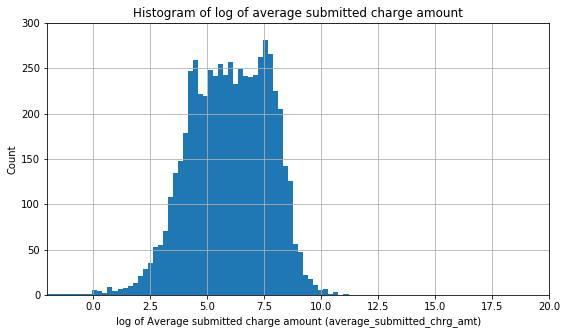

In [18]:
plot_hist(groups['average_submitted_chrg_amt'].apply(np.log), bins = 100, range_x_min = -2, range_x_max = 20, range_y_min = 0, range_y_max = 300, 
             x_label = "log of Average submitted charge amount (average_submitted_chrg_amt)",
             y_label = "Count",
             title = "Histogram of log of average submitted charge amount")

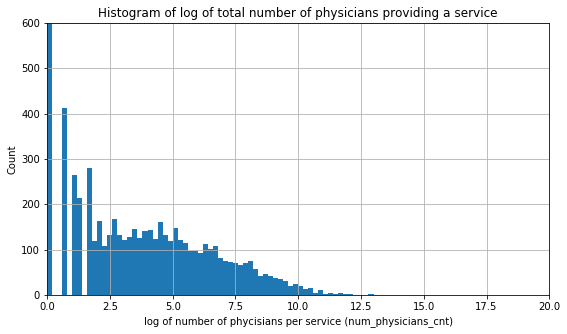

In [19]:
plot_hist(groups['num_physicians_cnt'].apply(np.log), bins = 100, range_x_min = 0, range_x_max = 20, range_y_min = 0, range_y_max = 600, 
             x_label = "log of number of phycisians per service (num_physicians_cnt)",
             y_label = "Count",
             title = "Histogram of log of total number of physicians providing a service")

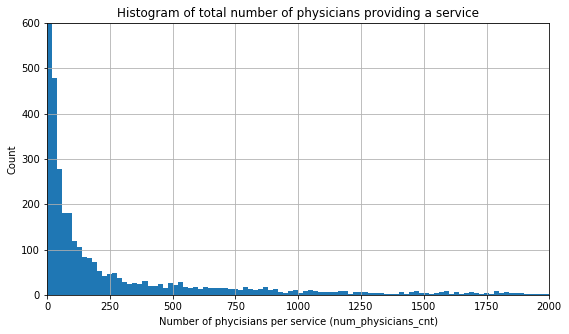

In [20]:
plot_hist(groups['num_physicians_cnt'], bins = 100, range_x_min = 0, range_x_max = 2000, range_y_min = 0, range_y_max = 600, 
             x_label = "Number of phycisians per service (num_physicians_cnt)",
             y_label = "Count",
             title = "Histogram of total number of physicians providing a service")

In [21]:
#Preparing final dataset
groups['l_average_submitted_chrg_amt'] = groups['average_submitted_chrg_amt'].apply(np.log)
groups['l_submitted_chrg_to_allowed_amt'] = groups['submitted_chrg_to_allowed_amt'].apply(np.log)
groups['l_bene_unique_cnt'] = groups['bene_unique_cnt'].apply(np.log)
groups['l_line_srvc_cnt'] = groups['line_srvc_cnt'].apply(np.log)
groups['l_num_physicians_cnt'] = groups['num_physicians_cnt'].apply(np.log)
groups.head()

,hcpcs_code,line_srvc_cnt,bene_unique_cnt,num_physicians_cnt,submitted_chrg_to_allowed_amt,average_submitted_chrg_amt,l_average_submitted_chrg_amt,l_submitted_chrg_to_allowed_amt,l_bene_unique_cnt,l_line_srvc_cnt,l_num_physicians_cnt
0,00100,60.0,57.0,4,5.573979,1487.493333,7.304848,1.718109,4.043051,4.094345,1.386294
1,00102,130.0,129.0,5,5.345642,506.934615,6.228382,1.676282,4.859812,4.867534,1.609438
2,00103,71318.0,69564.0,2441,5.827657,900.946364,6.803446,1.762615,11.150002,11.174904,7.800163
3,00104,142799.0,66466.0,2939,6.737764,601.833783,6.399981,1.907728,11.104446,11.869193,7.985825
4,00120,2425.0,2223.0,110,7.243546,1453.857336,7.281976,1.980111,7.706613,7.793587,4.700480


In [22]:
groups.corr()

,line_srvc_cnt,bene_unique_cnt,num_physicians_cnt,submitted_chrg_to_allowed_amt,average_submitted_chrg_amt,l_average_submitted_chrg_amt,l_submitted_chrg_to_allowed_amt,l_bene_unique_cnt,l_line_srvc_cnt,l_num_physicians_cnt
line_srvc_cnt,1.000000,0.652451,0.562266,-0.003775,-0.050029,-0.153414,-0.029283,0.223949,0.272533,0.212198
bene_unique_cnt,0.652451,1.000000,0.890454,-0.015823,-0.048547,-0.085994,-0.038486,0.276795,0.260839,0.263393
num_physicians_cnt,0.562266,0.890454,1.000000,-0.020269,-0.056629,-0.084110,-0.058778,0.321578,0.301734,0.335478
submitted_chrg_to_allowed_amt,-0.003775,-0.015823,-0.020269,1.000000,0.049920,-0.017164,0.533579,-0.001293,0.009787,0.009503
average_submitted_chrg_amt,-0.050029,-0.048547,-0.056629,0.049920,1.000000,0.623403,0.180967,-0.246376,-0.271908,-0.196082
l_average_submitted_chrg_amt,-0.153414,-0.085994,-0.084110,-0.017164,0.623403,1.000000,0.194854,-0.366753,-0.465761,-0.265411
l_submitted_chrg_to_allowed_amt,-0.029283,-0.038486,-0.058778,0.533579,0.180967,0.194854,1.000000,-0.010113,-0.034695,0.031015
l_bene_unique_cnt,0.223949,0.276795,0.321578,-0.001293,-0.246376,-0.366753,-0.010113,1.000000,0.959854,0.956134
l_line_srvc_cnt,0.272533,0.260839,0.301734,0.009787,-0.271908,-0.465761,-0.034695,0.959854,1.000000,0.918251
l_num_physicians_cnt,0.212198,0.263393,0.335478,0.009503,-0.196082,-0.265411,0.031015,0.956134,0.918251,1.000000


In [23]:
#Standardization
from sklearn.preprocessing import scale

final_features = ['l_average_submitted_chrg_amt','l_submitted_chrg_to_allowed_amt','l_bene_unique_cnt']
#for feature_name in final_features:
#    max_value = groups[feature_name].max()
#    min_value = groups[feature_name].min()
#    groups[feature_name] = groups.apply(lambda row: (row[feature_name] - min_value) / (max_value - min_value), axis=1)

#groups.head()

training_df = groups[final_features]
training_array = scale(training_df.values)

training_array

array([[ 0.75617629,  0.69881164, -0.98746257],
       [ 0.13982852,  0.62986555, -0.73231541],
       [ 0.46909052,  0.77217262,  1.23267049],
       ..., 
       [-0.54822731, -0.87935321,  1.71532478],
       [-0.26493057, -0.83144925, -0.88549988],
       [ 1.33223073, -1.67474586,  0.61363098]])

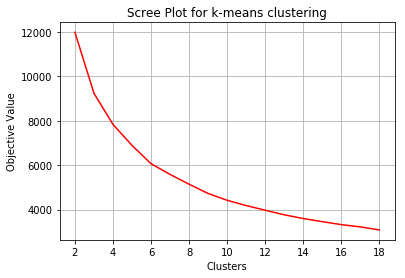

In [24]:
#KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



kmeans_list = []
kmeans_inertia = []
cluster_numbers = range(2,19)
for i in cluster_numbers:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10).fit(training_array)
    kmeans_list.append(kmeans)
    kmeans_inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(cluster_numbers, kmeans_inertia, 'r')
plt.xlabel('Clusters')
plt.ylabel('Objective Value')
plt.title('Scree Plot for k-means clustering')
plt.grid(True)
plt.show()
#kmeans.predict([[0, 0], [4, 4]])
#kmeans.cluster_centers_


In [25]:
selected_kmeans = kmeans_list[6] #Selecting cluster count = 8
print(selected_kmeans.cluster_centers_)
lab = selected_kmeans.labels_

unique, counts = np.unique(lab, return_counts=True)
print(unique)
print(counts)
from sklearn import metrics

print(metrics.silhouette_score(training_array, selected_kmeans.labels_,
                                      metric='euclidean',
                                      sample_size=groups.line_srvc_cnt.size))

[[-0.29295559 -0.69922041  0.58871982]
 [-0.82960778  0.77712908  0.06306495]
 [-0.94268992 -0.18131949  1.60808523]
 [-1.09041578 -1.20162744 -0.6277716 ]
 [ 0.79961809  0.40677431  0.50389261]
 [ 1.05090371  0.99540929 -0.88188692]
 [ 0.56742551 -0.52584167 -0.91633552]
 [-1.87086301  3.33634558  0.51324277]]
[0 1 2 3 4 5 6 7]
[ 849  655  792  629  872  977 1133   76]
0.25809652672


In [26]:
#PCA reduction into 2D 

reduced_data = PCA(n_components=2).fit_transform(training_array)
reduced_data


array([[-1.38611891,  0.14381709],
       [-0.76997504,  0.21097327],
       [ 0.17430254,  1.25354173],
       ..., 
       [ 1.75511826,  0.03519642],
       [-0.08131667, -1.14588816],
       [ 0.01754153, -1.20948549]])

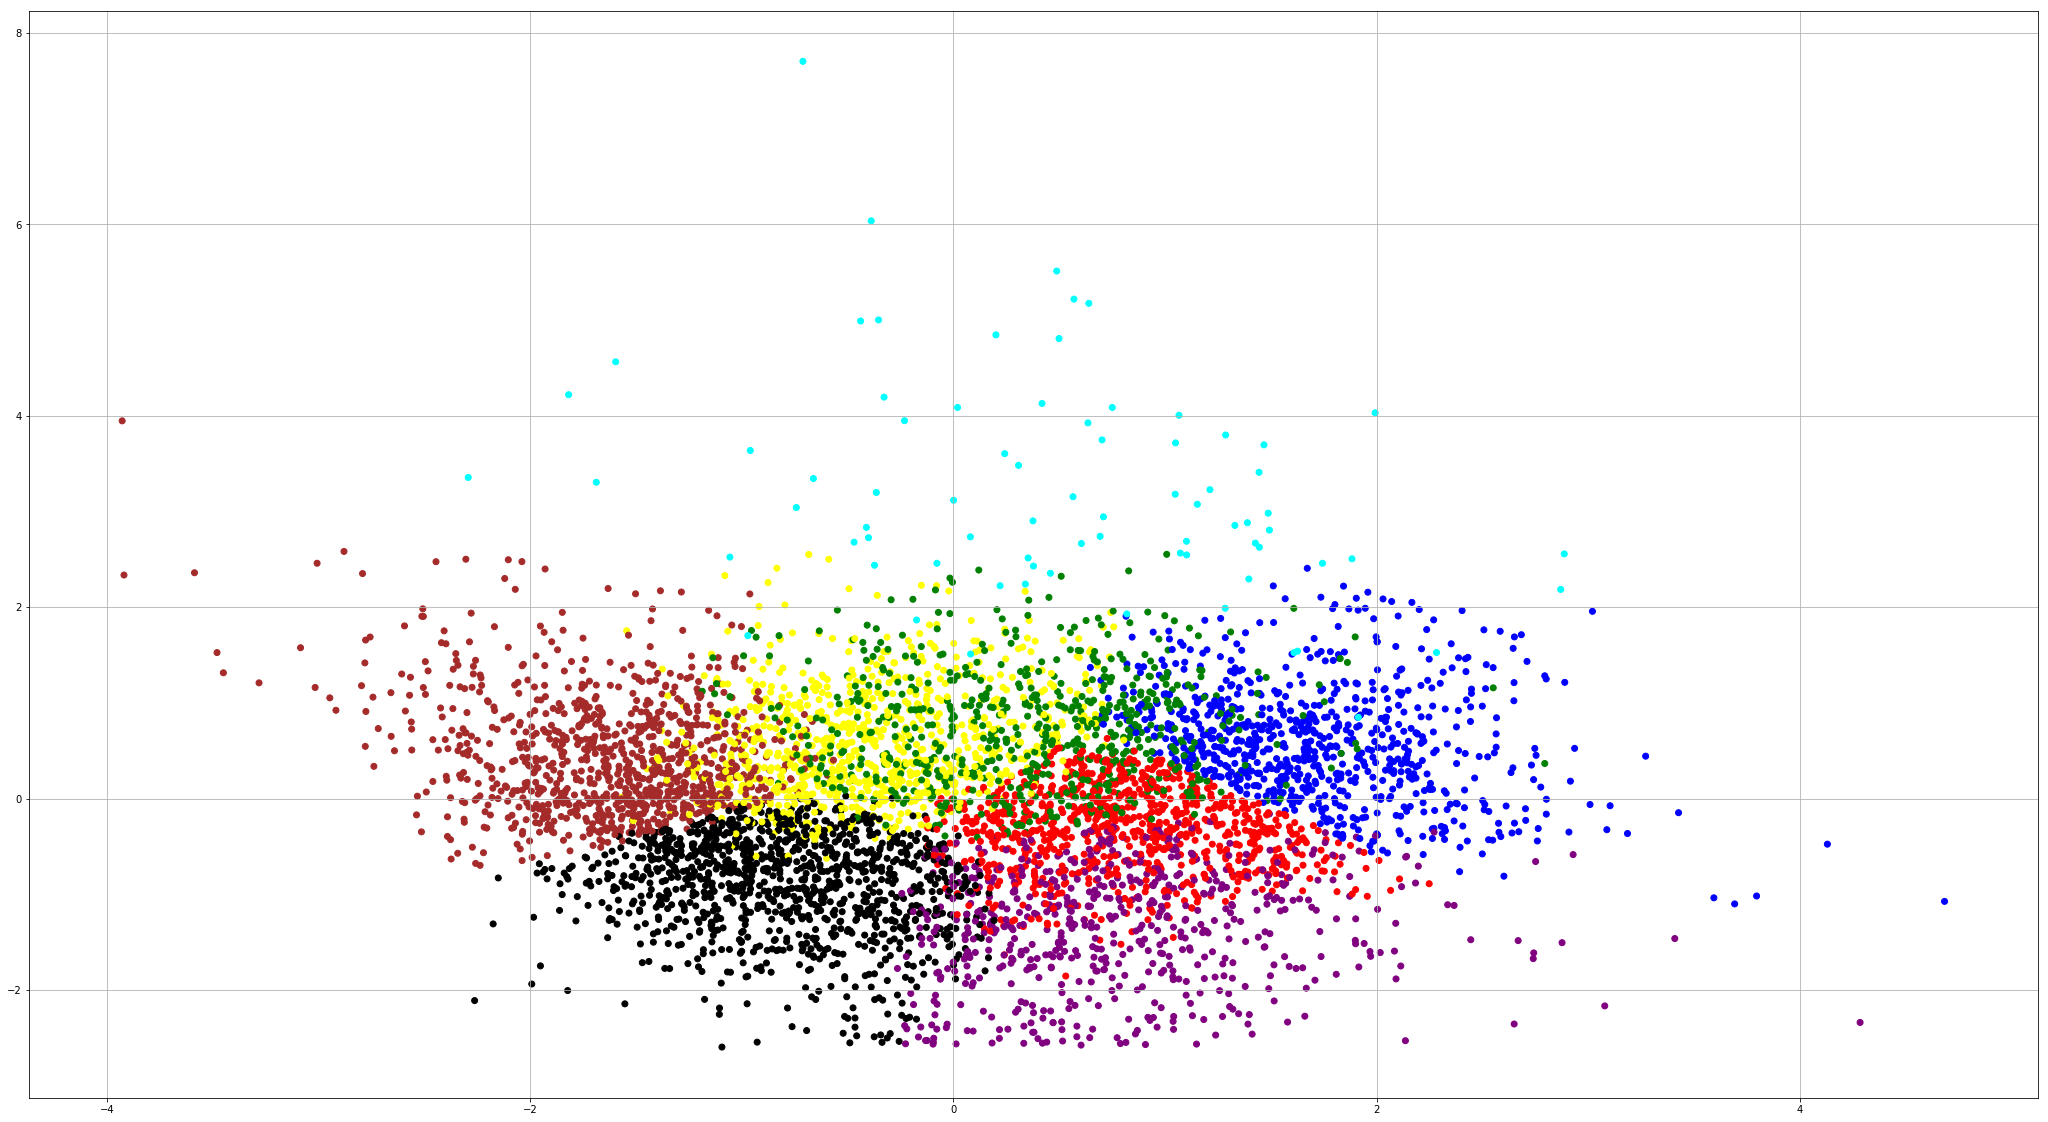

In [27]:
import matplotlib
lab = selected_kmeans.labels_
colors = ['red','green','blue', 'purple','yellow','brown','black', 'cyan']

plt.figure()
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=lab, cmap=matplotlib.colors.ListedColormap(colors))    
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(36, 20)
plt.show()
